In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### 1. Load data

In [2]:
dpath = Path("../../py_data/HEXPractice")

'''
mode:
cinlet: constant inlents
rinlet: random inlents
'''
mode = "rinlent"

# f_type: 0 - parallel, 1 - counter
f_type = 1

if f_type == 0:
    dfs = pd.read_csv(f"{dpath}/{mode}/parallel.csv", header=0)
    df_day1 = pd.read_csv(f"{dpath}/{mode}/parallel_day_1.csv", header=0)
    df_day50 = pd.read_csv(f"{dpath}/{mode}/parallel_day_50.csv", header=0)
    df_day100 = pd.read_csv(f"{dpath}/{mode}/parallel_day_100.csv", header=0)
    df_day200 = pd.read_csv(f"{dpath}/{mode}/parallel_day_200.csv", header=0)
elif f_type == 1:
    dfs = pd.read_csv(f"{dpath}/{mode}/counter.csv", header=0)
    df_day1 = pd.read_csv(f"{dpath}/{mode}/counter_day_1.csv", header=0)
    df_day50 = pd.read_csv(f"{dpath}/{mode}/counter_day_50.csv", header=0)
    df_day100 = pd.read_csv(f"{dpath}/{mode}/counter_day_100.csv", header=0)
    df_day200 = pd.read_csv(f"{dpath}/{mode}/counter_day_200.csv", header=0)

In [3]:
dfs.head()

,Day,F1m,F1i,F1o,F1v,F1D,F1Re,F1Nu,F1h,F1R,...,F2D,F2Re,F2h,F2R,F2Cf,F2Tau,Sigma2,Rf2,UA,Q
0,1,0.347234,565.538800,781.497316,1.245466,0.019860,5.565363e+06,1900.096037,11480.942824,0.022886,...,0.0146,20454.664971,6331.960739,0.032445,0.003908,3.835717,0.0,0.0,17.559972,142477.578586
1,2,0.261998,577.469266,788.177593,0.941018,0.019847,4.202081e+06,1517.582461,9175.919842,0.028654,...,0.0146,18731.397245,5901.473433,0.034812,0.003924,3.229294,0.0,0.0,13.580791,104889.874557
2,3,0.297898,570.760276,776.330816,1.072214,0.019826,4.782894e+06,1683.190717,10187.969305,0.025835,...,0.0146,20057.033562,6233.294956,0.032959,0.003912,3.691227,0.0,0.0,12.260098,116354.247989
3,4,0.270488,582.743797,764.456689,0.975103,0.019810,4.346260e+06,1559.097514,9444.344289,0.027891,...,0.0146,21302.668920,6541.111183,0.031408,0.003901,4.152996,0.0,0.0,10.976080,93387.360726
4,5,0.309830,577.963788,759.759784,1.118741,0.019794,4.982440e+06,1739.139153,10543.513411,0.025004,...,0.0146,21305.346295,6541.768858,0.031404,0.003901,4.154017,0.0,0.0,10.273724,107018.988136


In [4]:
x = dfs["Day"].to_numpy()

### 2. Plots of data (overall or average) vs. days

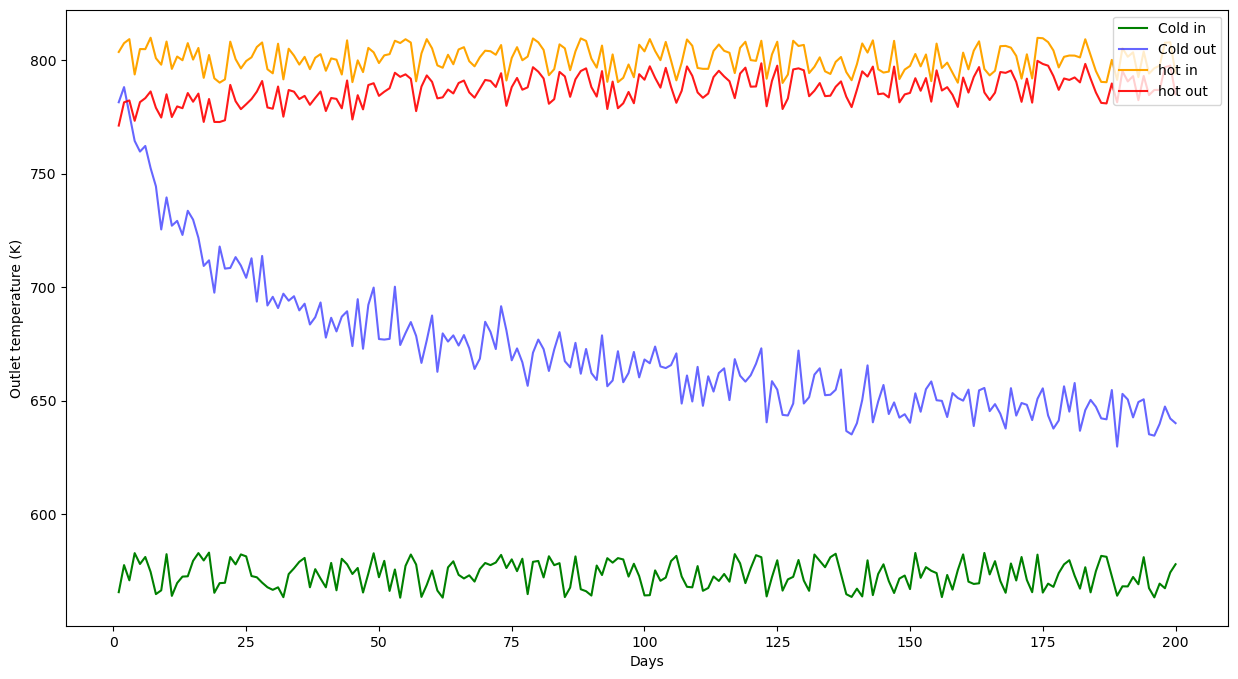

In [5]:
# outlet temperatures vs. time
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.plot(x, dfs["F1i"].to_numpy(), c="green", label="Cold in")
ax.plot(x, dfs["F1o"].to_numpy(), c="blue", alpha=0.6, label="Cold out")
ax.plot(x, dfs["F2i"].to_numpy(), c="orange", label="hot in")
ax.plot(x, dfs["F2o"].to_numpy(), c="r", alpha=0.9, label="hot out")
ax.set_ylabel("Outlet temperature (K)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")
plt.show()


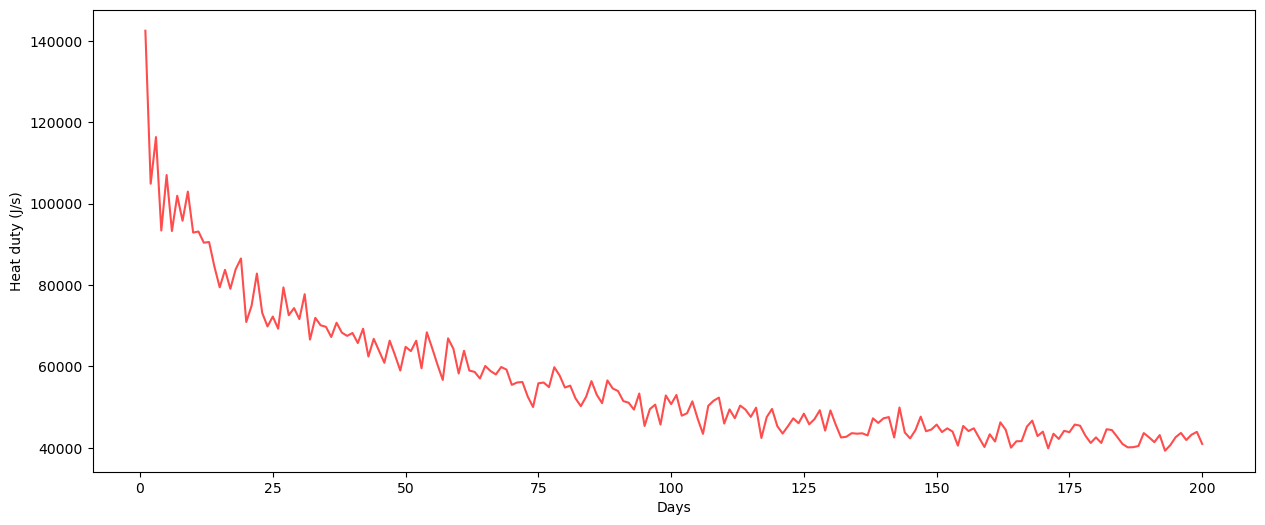

In [6]:
# Heat duty vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["Q"].to_numpy(), c="r", alpha=0.7)
plt.ylabel("Heat duty (J/s)")
plt.xlabel("Days")
plt.show()

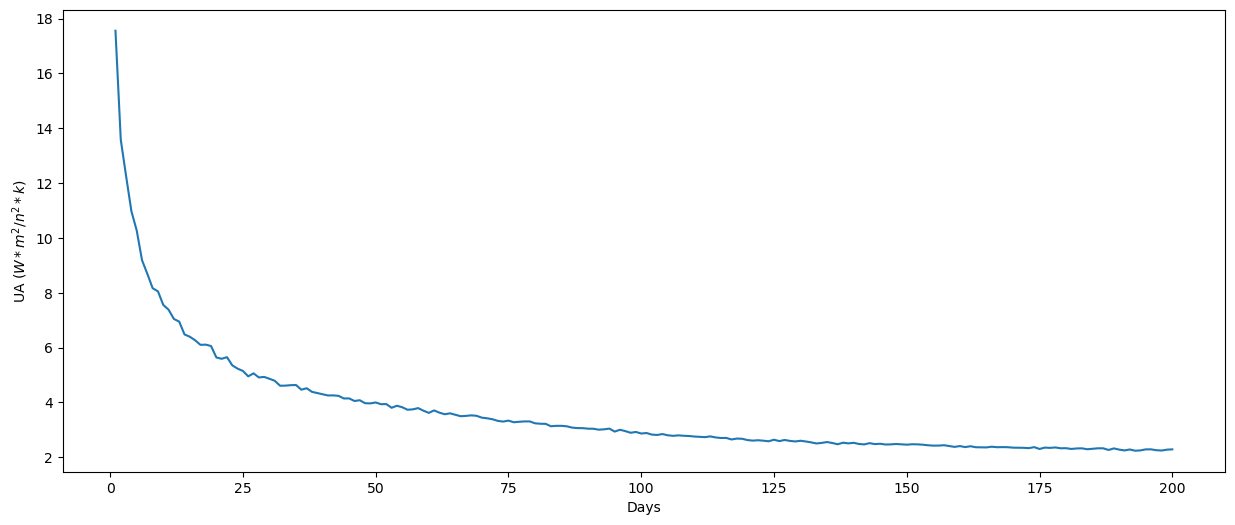

In [7]:
# UA vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["UA"].to_numpy())
plt.ylabel("UA ($W*m^2/n^2*k$)")
plt.xlabel("Days")
plt.show()

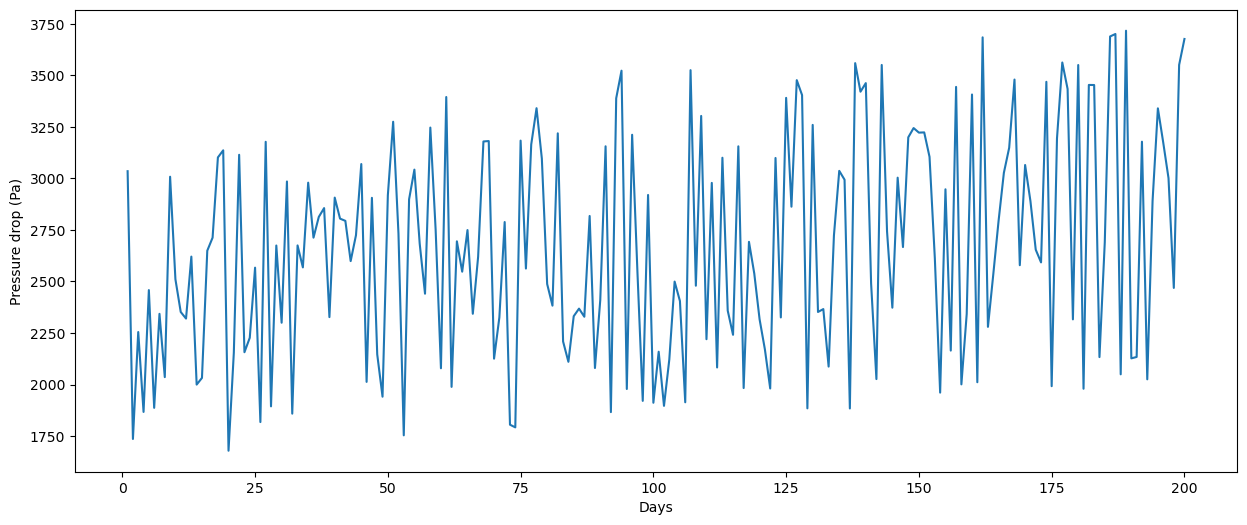

In [8]:
# dP vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["dP"].to_numpy())
plt.ylabel("Pressure drop (Pa)")
plt.xlabel("Days")
plt.show()

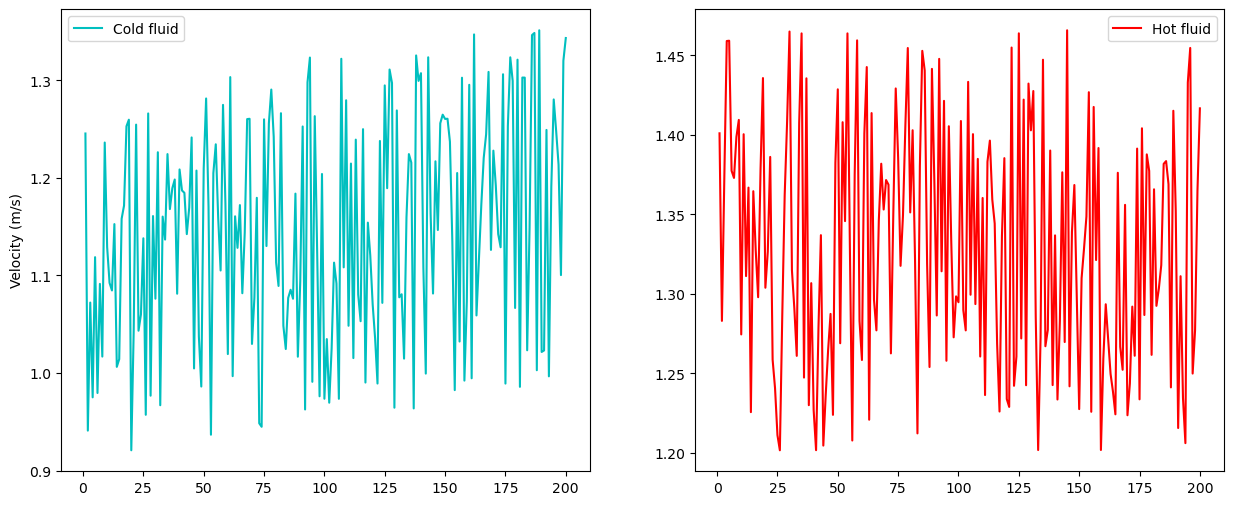

In [9]:
# Velocity vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(x, dfs["F1v"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(x, dfs["F2v"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Velocity (m/s)")
ax[0].legend()
ax[1].legend()
plt.show()


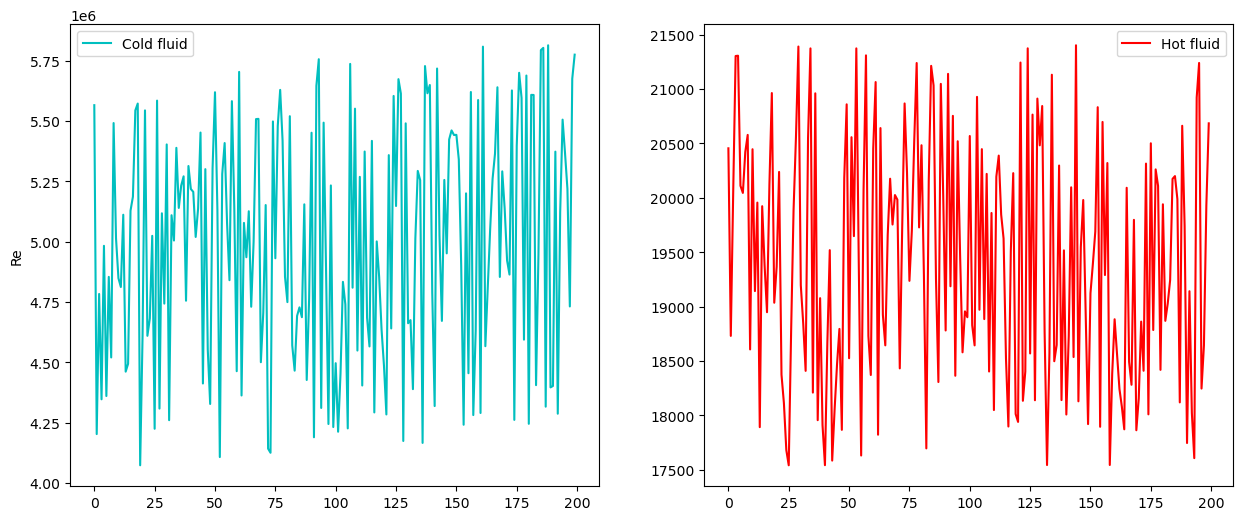

In [10]:
# Re vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(dfs["F1Re"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(dfs["F2Re"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Re")
ax[0].legend()
ax[1].legend()
plt.show()


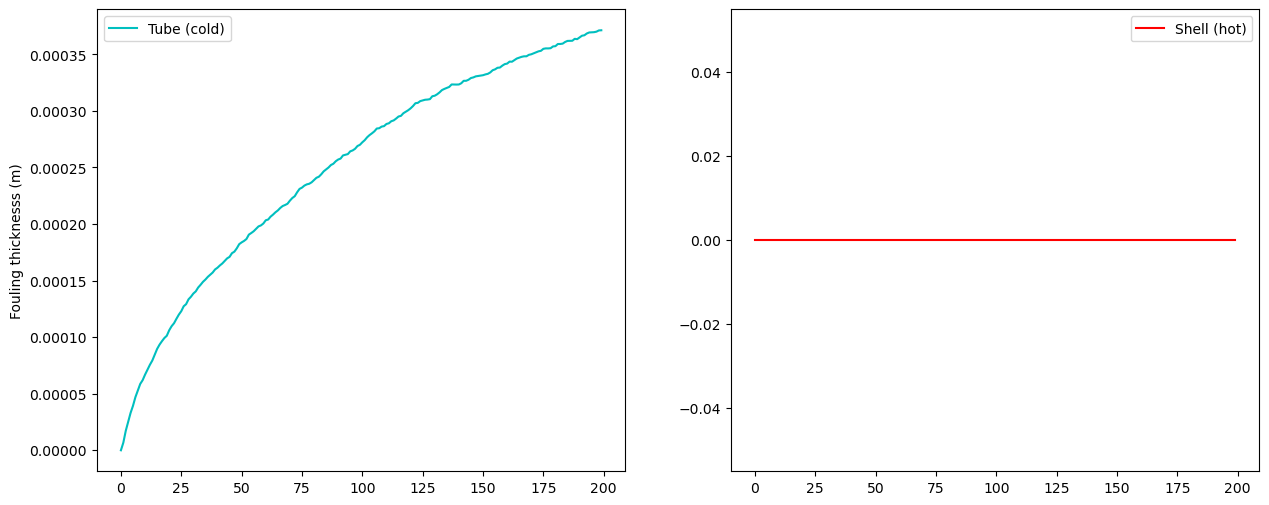

In [11]:
# Fouling thickness vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(dfs["Sigma1"].to_numpy(), c="c", label="Tube (cold)")
ax[1].plot(dfs["Sigma2"].to_numpy(), c="r", label="Shell (hot)")
ax[0].set_ylabel("Fouling thicknesss (m)")
ax[0].legend()
ax[1].legend()
plt.show()

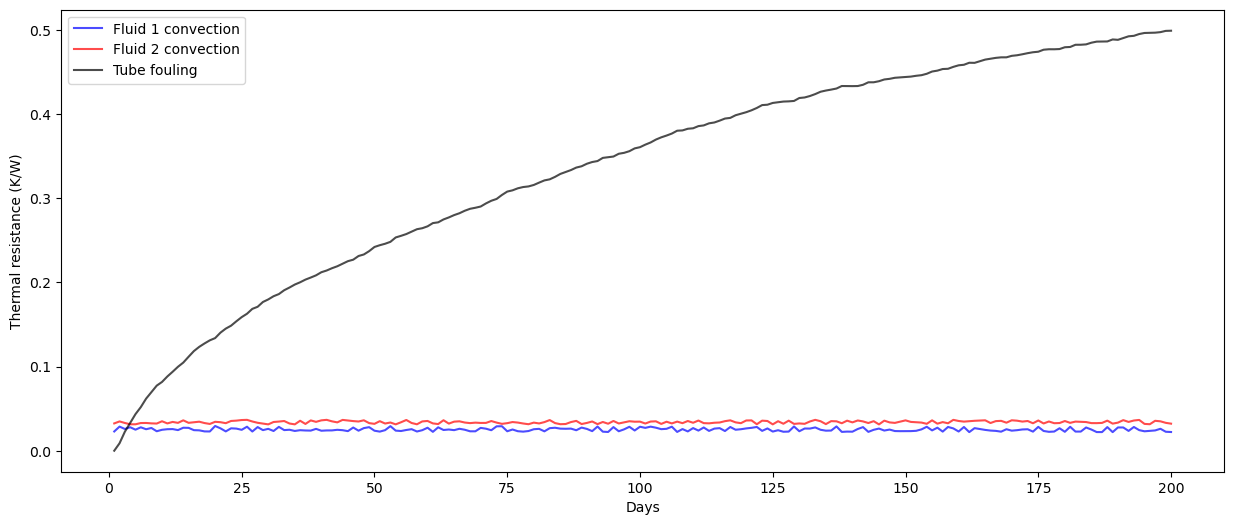

In [12]:
# Resistances vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["F1R"].to_numpy(), c="b", alpha=0.7, label="Fluid 1 convection")
plt.plot(x, dfs["F2R"].to_numpy(), c="r", alpha=0.7, label="Fluid 2 convection")
plt.plot(x, dfs["Rf1"].to_numpy(), c="black", alpha=0.7, label="Tube fouling")
plt.ylabel("Thermal resistance (K/W)")
plt.xlabel("Days")
plt.legend()
plt.show()

### 2. Plots of data vs. HEX distance of specific days

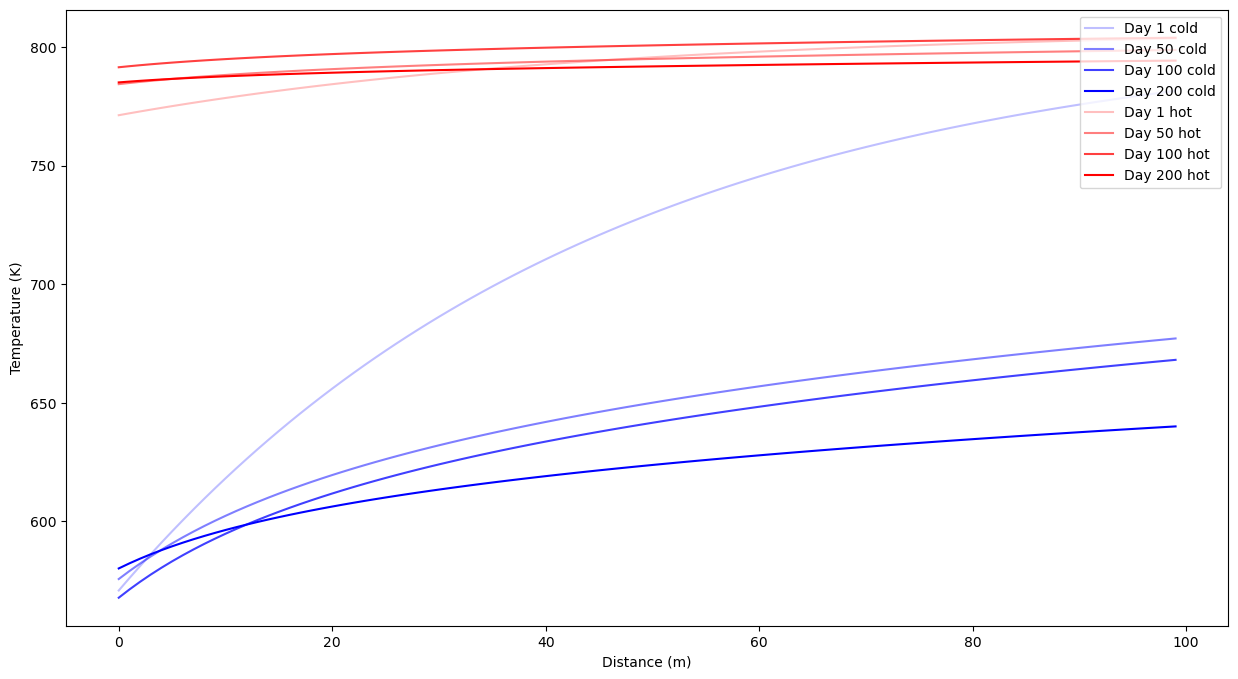

In [13]:
# temperatures vs. time
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.plot(df_day1["F1T"].to_numpy(), c="blue", alpha=0.25, label="Day 1 cold")
ax.plot(df_day50["F1T"].to_numpy(), c="blue", alpha=0.5, label="Day 50 cold")
ax.plot(df_day100["F1T"].to_numpy(), c="blue", alpha=0.75, label="Day 100 cold")
ax.plot(df_day200["F1T"].to_numpy(), c="blue", alpha=1, label="Day 200 cold")
ax.plot(df_day1["F2T"].to_numpy(), c="red", alpha=0.25, label="Day 1 hot")
ax.plot(df_day50["F2T"].to_numpy(), c="red", alpha=0.5, label="Day 50 hot")
ax.plot(df_day100["F2T"].to_numpy(), c="red", alpha=0.75, label="Day 100 hot")
ax.plot(df_day200["F2T"].to_numpy(), c="red", alpha=1, label="Day 200 hot")
ax.set_ylabel("Temperature (K)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

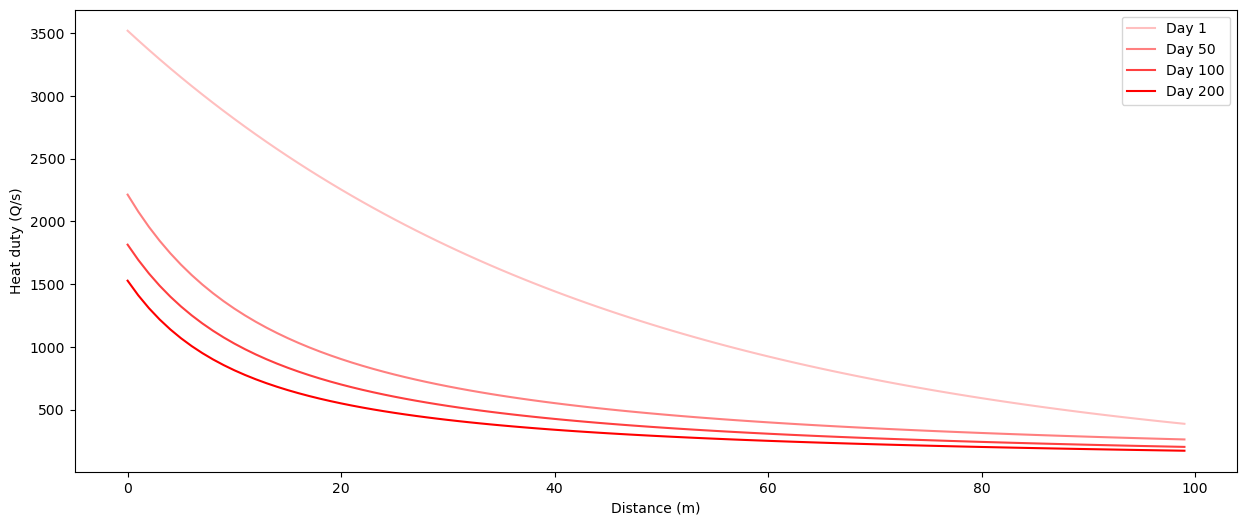

In [14]:
# heat duty vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(df_day1["Q"].to_numpy(), c="r", alpha=0.25, label="Day 1")
ax.plot(df_day50["Q"].to_numpy(), c="r", alpha=0.5, label="Day 50")
ax.plot(df_day100["Q"].to_numpy(), c="r", alpha=0.75, label="Day 100")
ax.plot(df_day200["Q"].to_numpy(), c="r", alpha=1, label="Day 200")
ax.set_ylabel("Heat duty (Q/s)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

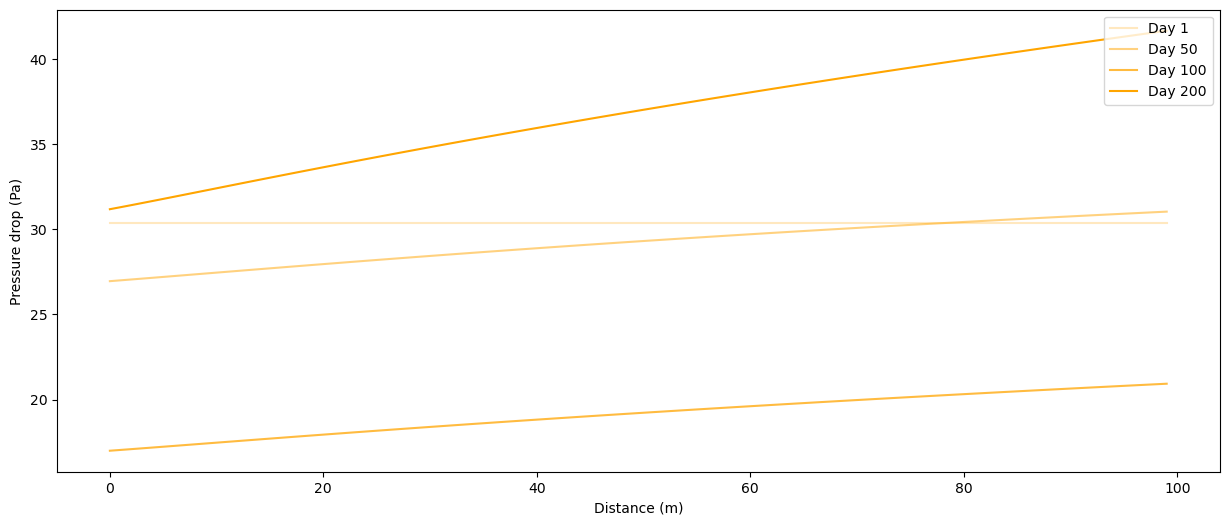

In [15]:
# pressure drop vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(df_day1["dP"].to_numpy(), c="orange", alpha=0.25, label="Day 1")
ax.plot(df_day50["dP"].to_numpy(), c="orange", alpha=0.5, label="Day 50")
ax.plot(df_day100["dP"].to_numpy(), c="orange", alpha=0.75, label="Day 100")
ax.plot(df_day200["dP"].to_numpy(), c="orange", alpha=1, label="Day 200")
ax.set_ylabel("Pressure drop (Pa)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

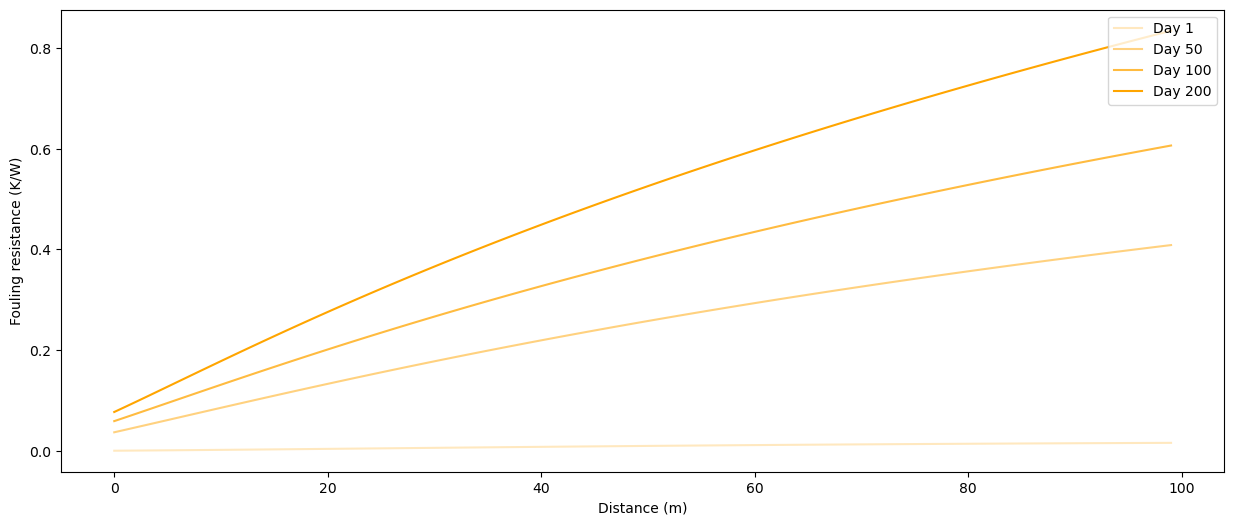

In [16]:
# fouling resistance vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(df_day1["Rf1"].to_numpy(), c="orange", alpha=0.25, label="Day 1")
ax.plot(df_day50["Rf1"].to_numpy(), c="orange", alpha=0.5, label="Day 50")
ax.plot(df_day100["Rf1"].to_numpy(), c="orange", alpha=0.75, label="Day 100")
ax.plot(df_day200["Rf1"].to_numpy(), c="orange", alpha=1, label="Day 200")
ax.set_ylabel("Fouling resistance (K/W)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

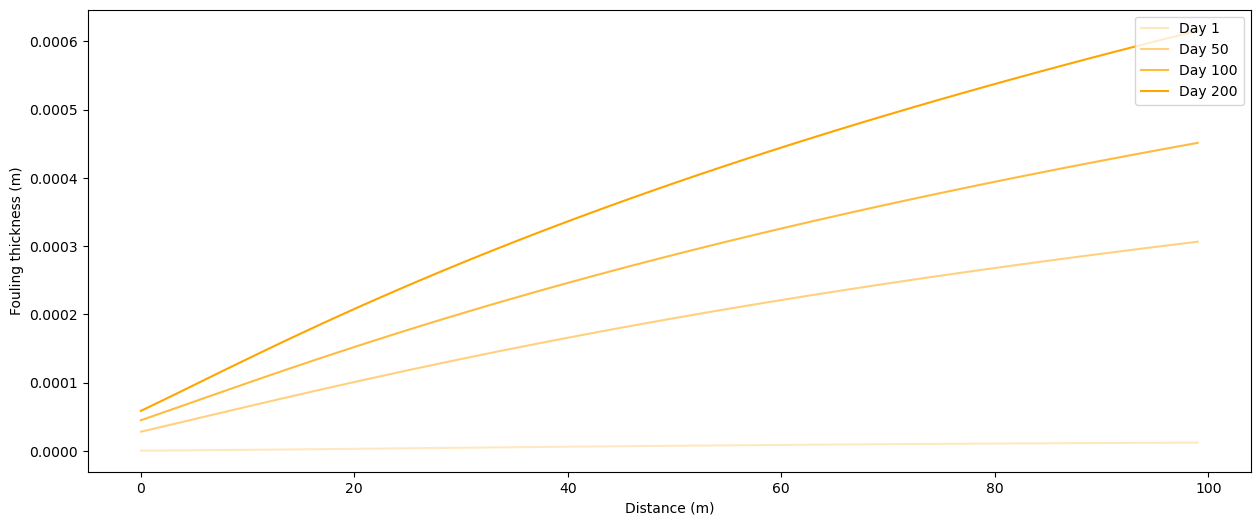

In [17]:
# fouling thickness vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(df_day1["Sigma1"].to_numpy(), c="orange", alpha=0.25, label="Day 1")
ax.plot(df_day50["Sigma1"].to_numpy(), c="orange", alpha=0.5, label="Day 50")
ax.plot(df_day100["Sigma1"].to_numpy(), c="orange", alpha=0.75, label="Day 100")
ax.plot(df_day200["Sigma1"].to_numpy(), c="orange", alpha=1, label="Day 200")
ax.set_ylabel("Fouling thickness (m)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()